In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("ticks")
sns.set_context("talk")

In [4]:
FIELDS = [
    "full_date",
    "Headache",
    "Exercise",
    "Ibuprofen",
    "Paracetamol",
    "Coffee",
    "Aimovig",
]

In [5]:
daylio_df = pd.read_csv(
    "./data/processed/daylio_2021_06_27.csv",
    index_col="full_date",
    parse_dates=True,
)
daylio_df = daylio_df.resample("1D").first()

In [6]:
daylio_df["Abortive"] = daylio_df[["Ibuprofen", "Eletriptan", "Indomethacin"]].astype(bool).any(axis=1).astype(
    float
)

In [7]:
recent_daylio_df = daylio_df["2020-07-21":].copy()

In [8]:
recent_daylio_df["cumulative_headaches"] = recent_daylio_df.Headache.cumsum()
recent_daylio_df["cumulative_ibuprofen"] = recent_daylio_df.Ibuprofen.cumsum()
recent_daylio_df["cumulative_eletriptan"] = recent_daylio_df.Eletriptan.cumsum()
recent_daylio_df["cumulative_indomethacin"] = recent_daylio_df.Indomethacin.cumsum()
recent_daylio_df["cumulative_abortive"] = recent_daylio_df.Abortive.cumsum()

In [9]:
plt.close('all')

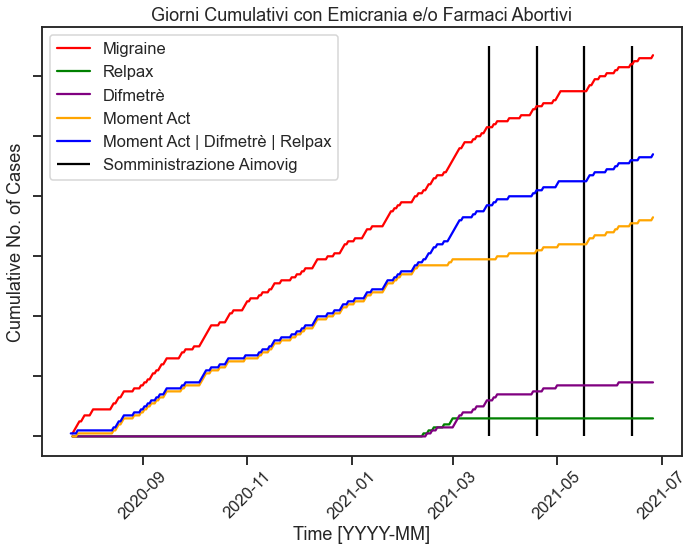

In [10]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(
    recent_daylio_df["cumulative_headaches"],
    color="red",
    label="Migraine",
)
ax.plot(
    recent_daylio_df["cumulative_eletriptan"],
    color="green",
    label="Relpax",
)
ax.plot(
    recent_daylio_df["cumulative_indomethacin"],
    color="purple",
    label="Difmetrè",
)
ax.plot(
    recent_daylio_df["cumulative_ibuprofen"],
    color="orange",
    label="Moment Act",
)
ax.plot(
    recent_daylio_df["cumulative_abortive"],
    color="blue",
    label="Moment Act | Difmetrè | Relpax",
)
ax.vlines(
    recent_daylio_df[recent_daylio_df["Aimovig"] == 1].index,
    0,
    130,
    color="black",
    label="Somministrazione Aimovig",
)
ax.set_xlabel("Time [YYYY-MM]")
plt.xticks(rotation = 45)
ax.set_ylabel("Cumulative No. of Cases")
ax.set_yticklabels([])
ax.legend(loc="upper left")
ax.set_title("Giorni Cumulativi con Emicrania e/o Farmaci Abortivi")

f.set_tight_layout(True)
plt.draw()

In [11]:
pre_aimovig_df = recent_daylio_df[:"2021-03-21"].copy()
post_aimovig_df = recent_daylio_df["2021-03-22":].copy()

In [12]:
pre_weekly = pre_aimovig_df.Headache.resample("1W").sum()
post_weekly = post_aimovig_df.Headache.resample("1W").sum()

In [13]:
pre_weights = np.ones_like(pre_weekly)/len(pre_weekly)
post_weights = np.ones_like(post_weekly)/len(post_weekly)

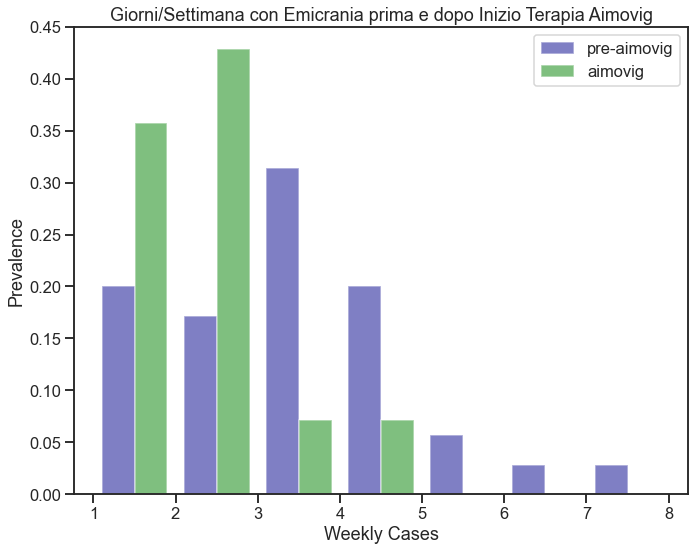

In [14]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.hist(
    [pre_weekly, post_weekly],
    label=["pre-aimovig", "aimovig"],
    bins=np.arange(1, 9),
    weights=[pre_weights, post_weights],
    alpha=0.5,
    color=["darkblue", "green"],
)
ax.set_xlabel("Weekly Cases")
ax.set_ylabel("Prevalence")
ax.legend()
ax.set_title("Giorni/Settimana con Emicrania prima e dopo Inizio Terapia Aimovig")
f.set_tight_layout(True)
plt.show()